In [3]:
import os
import sys
import cv2
import configparser
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import application.extractor.extract as extractor
from IPython.display import display
import application.detector.detect as detector
import application.enhancer.enhance as enhancer
import application.enhancer.mtcn_face as mtcn_face
import ipywidgets as widgets
from ipywidgets import Button, HBox, Checkbox, GridspecLayout, Layout, FloatSlider
from IPython.display import clear_output
from mtcnn.mtcnn import MTCNN
import time

Text(value='./application/input/A1/01.tif', description='Path:', placeholder='Type something')

Button(button_style='info', description='Gesichter extrahieren', style=ButtonStyle())

Checkbox(value=True, description='MTCNN Erkennung')

Checkbox(value=True, description='Verbesserte Erkennung')

Label(value='(11) Gesichter wurden erkannt')

FloatSlider(value=20.0, layout=Layout(visibility='visible'), max=20.0, readout_format='.1f')

20.0


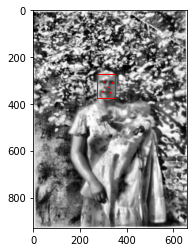

20.0


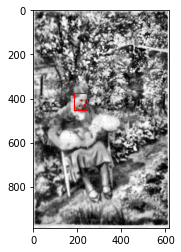

20.0


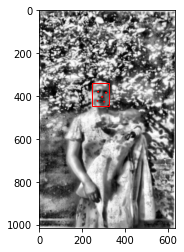

20.0


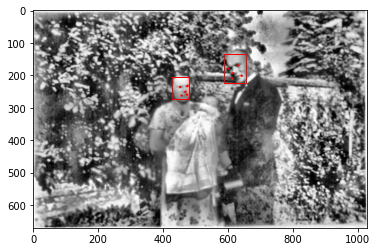

20.0


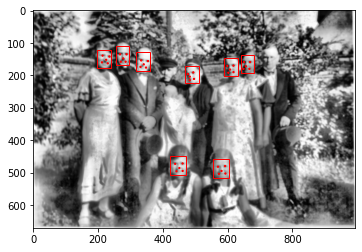

Bearbeitungsdauer:  2.35


In [9]:
cliplimitSlider = FloatSlider(value=1.5, min=0, max=20.0, step=0.1, readout_format='.1f')
path = './application/input/A1/01.tif'
image_folder_box = widgets.Text(
    value=r'./application/input/A1/01.tif',
    placeholder='Type something',
    description='Path:',
    disabled=False
)
information_label = widgets.Label(value="Wählen Sie die Erkennungsart und klicken Sie auf Gesichter extrahieren")
mtcnBox = Checkbox(False, description='MTCNN Erkennung')
enhancedBox = Checkbox(False, description='Verbesserte Erkennung')
button_extract_faces = Button(description="Gesichter extrahieren", button_style= 'info')
cliplimitSlider.layout.visibility  = 'hidden'




def displayButtons():
    display(image_folder_box)
    display(button_extract_faces)
    display(mtcnBox)
    display(enhancedBox)
    display(information_label)
    display(cliplimitSlider)
    
displayButtons()

def hideSlider(button):
    if button['new']:
        cliplimitSlider.layout.visibility  = 'visible'
    else:
        cliplimitSlider.layout.visibility  = 'hidden'
       
    
enhancedBox.observe(hideSlider, names='value')   

def extract_faces(b):
    clear_output(wait=True)
    displayButtons()
    from matplotlib import pyplot
    img = cv2.imread(image_folder_box.value, cv2.IMREAD_COLOR)
    information_label.value = "Die Gesichtsextraktion ist im Gange. Bitte warten Sie..."
    if img is None:
        sys.exit("Fehler kein Bild gefunden!")

    full_name = os.path.basename(path)
    name = os.path.splitext(full_name)[0]
    config = []
    cropped_images = extractor.get_background_extracted_images(img, config)
    enhance = enhancedBox.value
    mtcnn_face = mtcnBox.value
    standard_list = []
    mtcn_list = []
    length = 0
    
    for i, image in enumerate(cropped_images):
        start = time.time()
        img = extractor.get_frame_extracted_image(image, config)
        if enhance:
            img = enhancer.enhance_image(img, cliplimitSlider.value)
        if mtcnn_face:
            mtcnnDetector = MTCNN()
            # detect faces in the image
            faces = mtcnnDetector.detect_faces(img)
            
            length += len(faces)
            # display faces on the original image
            pyplot = mtcn_face.draw_image_with_boxes(img, faces, name + '_' + str(i))
            pyplot.show()
        else:
            path_frontal_classifier = './application/detector/cascade/haarcascade_frontalface.xml'
            path_profile_classifier = './application/detector/cascade/haarcascade_profileface.xml'
            frontal_classifier = cv2.CascadeClassifier(path_frontal_classifier)
            profile_classifier = cv2.CascadeClassifier(path_profile_classifier)
            faces_count = detector.get_detected_faces(img, frontal_classifier, profile_classifier, config, '/output', name + '_' + str(i))
            length += faces_count

            #standard_list.append(faces)
            
            pyplot.imshow(img)
            pyplot.title(name)
            pyplot.show()
    pyplot.show()
    end = time.time()
    print("Bearbeitungsdauer: ", round(end - start, 2))
    information_label.value = "(" + str(length) + ") Gesichter wurden erkannt"
button_extract_faces.on_click(extract_faces)

    